# OCR(Optical Character Recognition)
- 광학 문자 인식

## 사용사례
- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

## 기계가 문자를 읽는 과정
1. Text Detection(문자검출) : 입력받은 사진 속에서 문자의 위치를 찾아내는 것
2. Text Recognition(문자인식) : 찾은 문자 영역으로부터 문자를 읽어내는 것

## 문자의 영역을 표현하는 방법
- 축에 정렬된 사각형인 Bounding box
- 돌아간 사각형 Oriented bounding box
- 자유로운 사각형은 Quadrangle 
- 다각형인 Polygon
- Pixel 수준으로 영역을 표현한 Mask                                          

# 다양한 OCR모델 비교하기
- 와인 분류기
- 와인 종류가 워낙 많아서 와인병의 이름을 인식해서 와인을 분류할 수 있는 프로그램을 생각하게 됨
- 이미 삼성 카메라에 와인 분류하는 프로그램이 있어서 직접 사용해보고 비슷한 모델로 만들려고 함

# 1. 검증용 데이터셋 준비

In [35]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import keras_ocr

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [37]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/wine_data'
data_path

'/aiffel/aiffel/ocr_python/wine_data'

In [38]:
# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/aiffel/aiffel/ocr_python/wine_data/wine1.png',
 '/aiffel/aiffel/ocr_python/wine_data/wine2.png',
 '/aiffel/aiffel/ocr_python/wine_data/wine3.png',
 '/aiffel/aiffel/ocr_python/wine_data/wine4.png',
 '/aiffel/aiffel/ocr_python/wine_data/wine5.png']

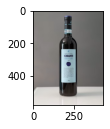

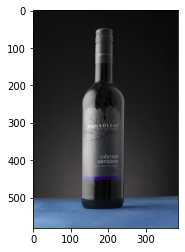

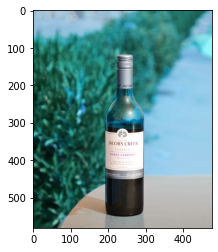

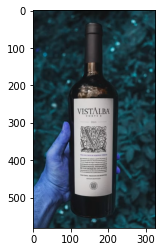

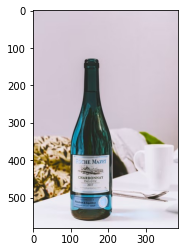

In [39]:
rows = 5
cols = 2
fig = plt.figure(figsize=(20,10))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    plt.imshow(img)
    
    plt.show()

# 2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

# 2-1. Google OCR API

In [43]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    print('Texts:')
    
    for text in texts:
        print('"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
# 다운받은 google ocr api 인증키 경로 저장 확인
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getenv('HOME') + '/aiffel/ocr_python/my_google_api_key.json'

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/test/test_image1.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

# 2-2. keras-ocr

In [23]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [24]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://images.unsplash.com/photo-1592845148519-b0d41df97ac2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80',
    'https://images.unsplash.com/photo-1610631787813-9eeb1a2386cc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80',
    'https://images.unsplash.com/photo-1606657765076-44154cfec14d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=477&q=80',
    'https://images.unsplash.com/photo-1584493306744-5fe6e59bc77b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=327&q=80',
    'https://images.unsplash.com/photo-1548701427-ce7529d732b7?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

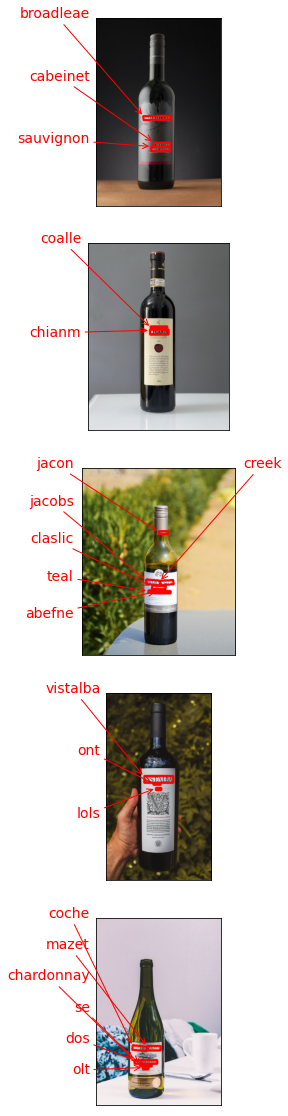

In [25]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

- keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델이라서 한글을 인식을 못함

# 2-3. Tesseract

In [ ]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# 이미지 영역 찾는 함수
def crop_word_regions(image_path, output_path):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/wine_data'
output_dir = os.getenv('HOME')+'/aiffelocr_python/wine_output'
img_file_path = work_dir + '/6.JPG'   
cropped_image_path_list = crop_word_regions(img_file_path, output_dir)

In [ ]:
output_dir_id = 'EP18_data/output_id'
cropped_image_id_path_list = crop_word_regions_kor(img_id_path, output_dir_id)